# Coordinate descent for least squares

Author: Alexandre Gramfort, Mathurin Massias

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

## Generate simulated data

$y = Ax+noise$

In [0]:
np.random.seed(0)
n_samples, n_features = 300, 100
A = np.random.randn(n_samples, n_features)
x = np.random.randn(n_features)
y = np.dot(A, x)
y += 0.3 * np.random.randn(n_samples)

## Option 1 : 

$\min_w \frac{1}{2} \|y - Ax\|^2$

solved with `linalg.solve`

**linalg.solve** <br/>

Code : $np.linalg.solve(a,b)$ <br/>

Solve a linear matrix equation, or system of linear scalar equations.
Computes the exact solution, $x$, of the well-determined, i.e., full rank, linear matrix equation $ax = b$. <br/>

Parameters : 

- $a : array\_like$ : coeffiecient matrix.
- $b : array\_like$ : ordinate or dependent variable values.

Returns : 

- $x ndarray$ : solution to the system $ax = b$. Returned shape is identical to $b$. 

Raises : 

- LinAlgError : if $a$ is singular or not square therefore not invertible.

In [0]:
x_solve = linalg.solve(np.dot(A.T, A), np.dot(A.T, y))

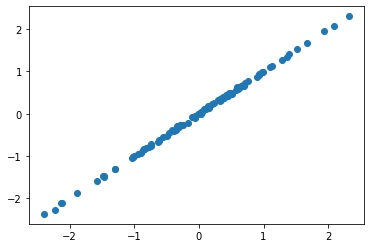

In [4]:
plt.scatter(x, x_solve);

## Option 2: gradient descent

Text(0, 0.5, 'objective')

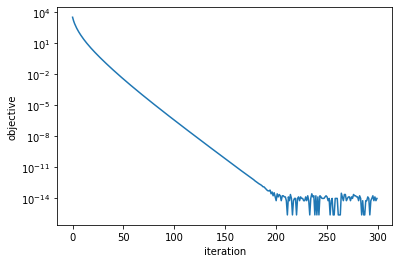

In [5]:
def gradient(x):
    return np.dot(A.T, np.dot(A, x) - y)


def objective(x):
    return 0.5 * linalg.norm(np.dot(A, x) - y) ** 2


L = linalg.norm(A, ord=2) ** 2

n_iter = 300

x_hat = np.zeros_like(x)
objs = list()
for k in range(n_iter):
    x_hat -= 1. / L * gradient(x_hat)
    objs.append(objective(x_hat))

eps = np.finfo('float').eps
plt.semilogy(np.maximum(np.array(objs) - objective(x_solve), eps))
plt.xlabel('iteration')
plt.ylabel('objective')

## Option 3: cyclic coordinate descent

Text(0, 0.5, 'objective')

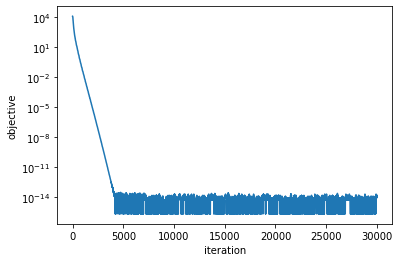

In [6]:
Li = np.sum(A ** 2, axis=0)

n_iter = 300 * n_features

x_hat = np.zeros_like(x)
objs = list()
for k in range(n_iter):
    i = k % n_features
    x_hat[i] = np.dot(A[:, i].T, y - np.dot(A, x_hat) + x_hat[i] * A[:, i])
    x_hat[i] /= np.dot(A[:, i], A[:, i])
    objs.append(objective(x_hat))

plt.semilogy(np.maximum(np.array(objs) - objective(x_solve), eps))
plt.xlabel('iteration')
plt.ylabel('objective')

### or written in a more generic manner:

Text(0, 0.5, 'objective')

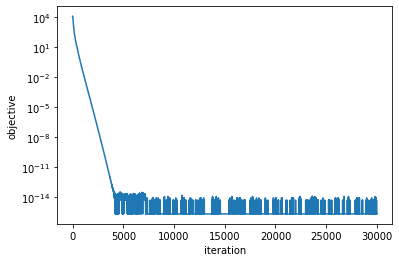

In [7]:
def gradient_i(x, i):
    return np.dot(A[:, i].T, np.dot(A, x) - y)

Li = np.sum(A * A, axis=0)

n_iter = 300 * n_features

x_hat = np.zeros_like(x)
objs = list()
for k in range(n_iter):
    i = k % n_features
    x_hat[i] -= 1. / Li[i] * gradient_i(x_hat, i)
    objs.append(objective(x_hat))

plt.semilogy(np.maximum(np.array(objs) - objective(x_solve), eps))
plt.xlabel('iteration')
plt.ylabel('objective')